In [2]:
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import cross_val_predict
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn import metrics
%matplotlib inline 

#Linear Regression

Load the data in

In [6]:
data = pd.read_csv('Boston_Housing.csv')

Use the built in 'describe' method for a high level view

In [7]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Use matplotlib to plot CRIM against MEDV

In [58]:
len(data.columns)

14

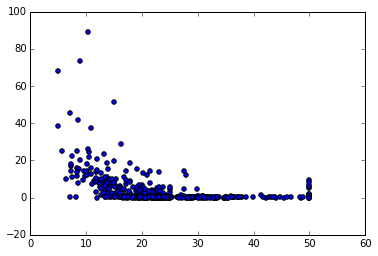

In [26]:
plt.scatter(data.MEDV, data.CRIM)

SOLO: Generate the remaining 12 plots. Which features looks to be most predictive?

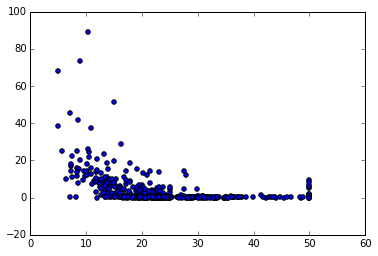

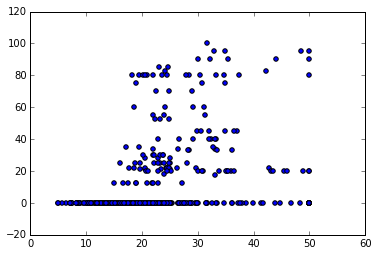

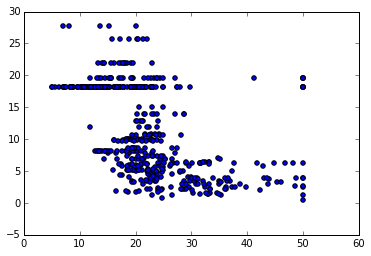

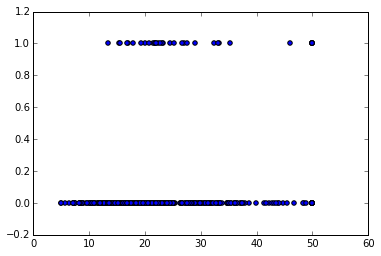

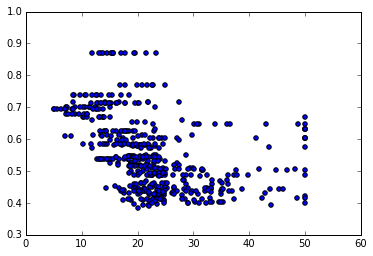

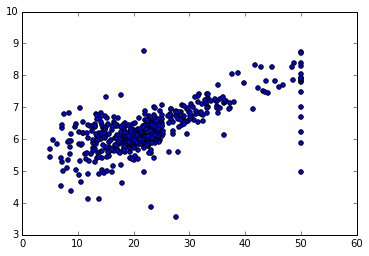

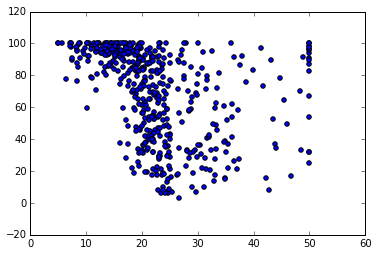

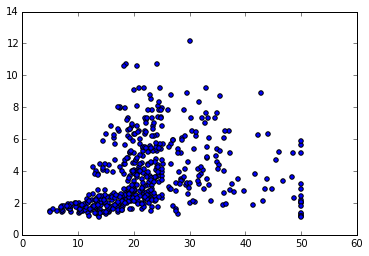

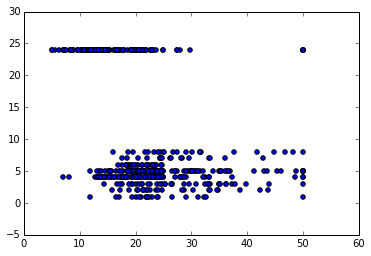

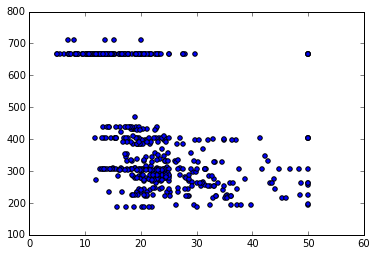

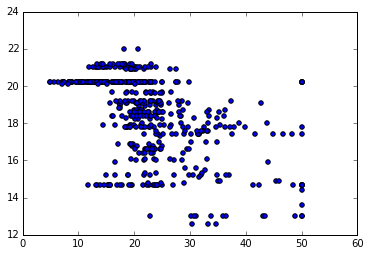

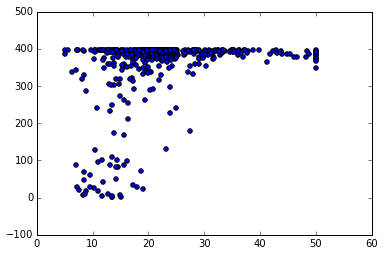

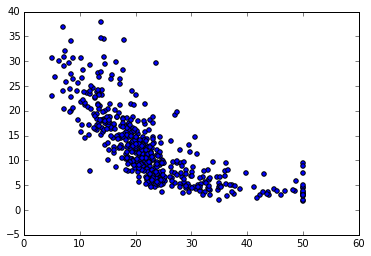

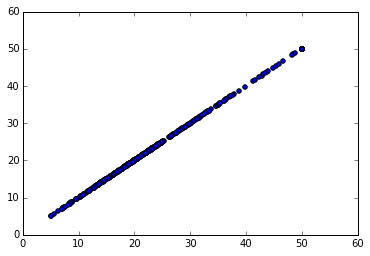

In [74]:
for column in data.columns:
    data.column = data[column]
    plt.figure()
    plt.scatter(data.MEDV, data.column)
    #plt.title = column
    

Define features and target

In [65]:
features = data[['LSTAT','RM']]
target = data['MEDV']

Using train_test_split, create training and test subgroups of your data

In [52]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.33, random_state = 42)

Fit the linear regression model using 3 columns

In [53]:
lr = LinearRegression()
lr.fit(features_train, target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Print the intercept and coefficients

In [54]:
print lr.intercept_
print lr.coef_

-8.14901081795
[-0.63784482  0.01461329  4.9595162   4.20206416  0.01112686]


Use predict to get our predicted values

In [55]:
target_pred = lr.predict(features_test)
zip(target_pred, target_test)

[(25.827735407765648, 23.600000000000001),
 (31.239217820199084, 32.399999999999999),
 (18.257764902882752, 13.6),
 (25.857483782240987, 22.800000000000001),
 (20.688984820910743, 16.100000000000001),
 (22.65349150716785, 20.0),
 (17.485206300425453, 17.800000000000001),
 (15.353923531282383, 14.0),
 (22.547321368874432, 19.600000000000001),
 (20.859897918705112, 16.800000000000001),
 (18.046039536461965, 21.5),
 (18.712849327048922, 18.899999999999999),
 (-5.1225133279259865, 7.0),
 (22.370564930209948, 21.199999999999999),
 (20.458921771415113, 18.5),
 (27.086515165343823, 29.800000000000001),
 (17.780060821317242, 18.800000000000001),
 (4.9136514843371391, 10.199999999999999),
 (37.437195788233097, 50.0),
 (19.757555372670293, 14.1),
 (26.567281192749238, 25.199999999999999),
 (27.535879306244663, 29.100000000000001),
 (13.293390143971401, 12.699999999999999),
 (26.51716494507016, 22.399999999999999),
 (19.316721222242769, 14.199999999999999),
 (14.802136518349297, 13.80000000000000

Calculate the root mean squared error 

In [56]:
np.sqrt(metrics.mean_squared_error(target_test, target_pred))

5.3781060693399905

Use score to get our R^2 values

In [64]:
lr.score(features_test, target_test)

0.61780397744214821

SOLO: Fit the model using all of the feature columns. How does this impact the accuracy?

In [76]:
features = data[[column for column in data.columns[:len(data.columns)-1]]]
target = data['MEDV']

In [77]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.33, random_state = 42)

In [78]:
lr = LinearRegression()
lr.fit(features_train, target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [79]:
print lr.intercept_
print lr.coef_

33.3349757556
[ -1.28749718e-01   3.78232228e-02   5.82109233e-02   3.23866812e+00
  -1.61698120e+01   3.90205116e+00  -1.28507825e-02  -1.42222430e+00
   2.34853915e-01  -8.21331947e-03  -9.28722459e-01   1.17695921e-02
  -5.47566338e-01]


In [82]:
target_pred = lr.predict(features_test)
print np.sqrt(metrics.mean_squared_error(target_test, target_pred))
print lr.score(features_test, target_test)

4.55236459846
0.726157083655


In [83]:
data.columns

Index([u'CRIM', u'ZN', u'INDUS', u'CHAS', u'NOX', u'RM', u'AGE', u'DIS',
       u'RAD', u'TAX', u'PTRATIO', u'B', u'LSTAT', u'MEDV'],
      dtype='object')

In [96]:
features = data[['RM','LSTAT','INDUS']]
target = data['MEDV']
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.33, random_state = 42)
lr = LinearRegression()
lr.fit(features_train, target_train)
target_pred = lr.predict(features_test)
print np.sqrt(metrics.mean_squared_error(target_test, target_pred))
print lr.score(features_test, target_test)

5.37527503454
0.618206247476
